In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Defining Activation Functions
Activation Functions are really important in Neural Networks, they help to make sense out of something very complicated by introducing a non-linearity between the input and output response. They introduce non-linear properties to our Network.

If we do not use activation function our network will be linear function. Linear equations are easy to solve but they are limited in complexity. A Neural Network without Activation function would simply be a Linear regression Model
### Sigmoid : $ \frac{1}{1+ \epsilon^{-z} } $
1. Have problem when, error is too large, it has learns slow, The gradient of sigmoids becomes increasingly small as the absolute value of x increases which causes vanishing gradient problem.
2. Generally used in Last layer only, because it gives output between 0 and 1

### ReLU : $ max( 0, z ) $
1. Generally used in hidden layers
2. Have a regularization effect, because some node outputs 0.
3. One major benefit is the reduced likelihood of the gradient to vanish. This arises when z>0. In this regime the gradient has a constant value. The constant gradient of ReLUs results in faster learning.


In [2]:
def sigmoid(Z): return 1/(1+np.exp(-Z))
def relu(Z): return np.maximum(0,Z)

In [3]:
def initialize_two_hidden_layer_nn(n_x, n_h1, n_h2, n_y): # (n,16,8,1)
    
    W1 = np.random.randn(n_x,n_h1)   #(n,16)
    b1 = np.zeros( shape=(1, n_h1) ) #(1,16)
    
    W2 = np.random.randn( n_h1,n_h2) #(16,8)
    b2 = np.zeros( shape=(1, n_h2) ) #(1,8)
    
    W3 = np.random.randn( n_h2,n_y)  #(8,1)
    b3 = np.zeros( shape=(1, n_y) )  #(1,1)
    
    return { 'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3  }

In [4]:
def forward_prop( X, parameters ): #X = (:,n)
    W1 = parameters['W1'] # (n,16)
    b1 = parameters['b1']  # (1,16)
    W2 = parameters['W2'] # (16,8)
    b2 = parameters['b2'] # (1,8)
    W3 = parameters['W3'] # (8,1)
    b3 = parameters['b3'] # (1,1)
    
    #forward_prop
    Z1 = np.dot( X, W1 ) + b1 # (n,16)
    A1 = relu(Z1) #(n,16)
    Z2 = np.dot( A1, W2 ) + b2 # (n,8)
    A2 = relu(Z2) #(n,8)
    Z3 = np.dot( A2, W3 ) + b3 # (n,1)
    A3 = sigmoid(Z3) #(n,1)
    
    return A3, {'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2,'Z3':Z3,'A3':A3}

## Loss Function
1. Loss function is defined on one data point, prediction and label, and measures the penalty
2. Cost function is usually more general. It might be a sum of loss functions over your training set plus some model complexity penalty (regularization).

### Cross entropy loss function or Log Loss
1. Defination : $ -{(y\log(p) + (1 - y)\log(1 - p))} $
2. If y = 0, p = ~1: Loss must be high, by equation -(0 + -infinity)
3. If y = 0, p = ~0: Loss must be low, by equation -(0+ ~0)
4. If y = 1, p = ~1: Loss must be low, by equation -(~0 + 0)
5. If y = 1, p = ~0: Loss must be low, by equation -(-infinity + 0)

In [5]:
def cost_function( AL, Y ): #Y = (:,1)
    """ cross entropy loss function"""
    m = Y.shape[0]
    loss = -1 * ( np.multiply(Y, np.log(AL)) + np.multiply((1 - Y), np.log(1 - AL)) ) # (:,1)
    cost = (1/m)*np.sum(loss) #float
    return cost

### Important Derivatives

1. Sigmoid Derivative :  $ \frac {\partial sigmoid}{ \partial z } = g' = sigmoid * (1-sigmoid) $
2. ReLU Derivative : $ \frac{\partial relu}{\partial z} = if z>0, 1 \; else \; 0 $
3. Derivative of Cross-Entropy Loss wrt last layer activation(prob) : $ \frac{ \partial loss}{\partial AL} = -( \frac{Y}{AL} - \frac{1-Y}{1-AL} ) $

In [6]:
def sigmoid_derivative(z): # g = 'sigmoid'
    s = sigmoid(z)
    return s * (1-s)

def relu_derivative(z): # g = 'relu'
    return (z>0)*1

def derviative_of_cross_entropy_loss(AL,Y):
    return -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

### Backpropogation Using Gradient Descent

![NN Architecture](images/basic_nn.png)

1. $ \frac{dL}{dA3} = gradient \; of \; cost \; function \; wrt \; output $
2. $ \frac{dL}{dZ3} = \frac{dL}{dA3}*\frac{dA3}{dZ3} = \frac{dL}{dA3}*\frac{d(g(Z3))}{d(Z)} = \frac{dL}{dA3} * g'(\scriptsize Z3); \; where \; g' = \frac{\partial relu}{\partial z} $
3. $ \frac{dL}{dW3} = \scriptsize A2^T . \frac{dL}{dZ3}, \frac{dL}{db3} = \frac{dL}{dZ3} $
4. $ \frac{dL}{dA2} = \frac{dL}{dZ3} . \scriptsize W3^{T} $
5. $ \frac{dL}{dZ2} = \frac{dL}{dA2}*\frac{dA2}{dZ2} = \frac{dL}{dA2}*\frac{d(g(Z2))}{d(Z)} = \frac{dL}{dA2} * g'(\scriptsize Z2) \; where \; g' = \frac{\partial relu}{\partial z}  $
6. $ \frac{dL}{dW2} = \scriptsize A1^T . \frac{dL}{dZ2}, \frac{dL}{db2} = \frac{dL}{dZ2} $
7. $ \frac{dL}{dA1} = \frac{dL}{dZ1} . \scriptsize W2^{T} $
8. $ \frac{dL}{dZ1} = \frac{dL}{dA1}*\frac{dA2}{dZ1} = \frac{dL}{dA1}*\frac{d(g(Z1))}{d(Z)} = \frac{dL}{dA1} * g'(\scriptsize Z1) \; where \; g' = \frac{\partial sigmoid}{\partial z}  $
9. $ \frac{dL}{dW1} = \scriptsize X^T . \frac{dL}{dZ1}, \frac{dL}{db1} = \frac{dL}{dZ1} $


#### Summary:
1. $ dA[-1] = gradient \; of \; output \; (depend \; on \; cost \; function) $
2. $ dA[n-1] = dZ[n]. W^T $
3. $ dZ[n] = dA[n] * g'(Z[n]) $
4. $ dW[n] = dA[n-1] . dZ[n] $
5. $ db[n] = sum(dZ[n], axis=0) $

In [7]:
def backward_prop(X, Y, parameters, cache, lr = 1.0, clip_norm=0.01):
    m = X.shape[0]
    
    AL = cache['A3'] #output (activation of last layer) #(:,1)
    dA3 = derviative_of_cross_entropy_loss(AL,Y) #(:,1)
    
    dZ3 = sigmoid_derivative(cache['Z3']) * dA3 #(:,1)
    dW3 = np.dot( cache['A2'].T, dZ3 )/m        #(8,1)
    db3 = np.sum(dZ3, axis=0, keepdims=True)/m  #(1,1)
        
    dA2 = np.dot( dZ3, parameters['W3'].T )     #(:,8)
    
    dZ2 = relu_derivative(cache['Z2']) * dA2    #(:,8)
    dW2 = np.dot( cache['A1'].T, dZ2 )/m        #(16,8)
    db2 = np.sum( dZ2, axis=0,keepdims=True)/m  #(1,8)
    
    dA1 = np.dot( dZ2, parameters['W2'].T )     #(:,16)
    
    dZ1 = relu_derivative(cache['Z1'] ) * dA1   #(:,16)
    dW1 = np.dot( X.T, dZ1 )/m                  #(n,16)
    db1 = np.sum( dZ1, axis=0,keepdims=True)/m  #(1,16)
        
    W1 = parameters['W1'] - np.clip(lr*dW1,-clip_norm,clip_norm) #clipping to avoid exploding gradient
    W2 = parameters['W2'] - np.clip(lr*dW2,-clip_norm,clip_norm)
    W3 = parameters['W3'] - np.clip(lr*dW3,-clip_norm,clip_norm)
    b1 = parameters['b1'] - lr*db1
    b2 = parameters['b2'] - lr*db2
    b3 = parameters['b3'] - lr*db3
    
    return { 'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2,'W3':W3,'b3':b3 }

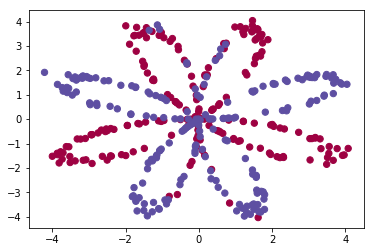

In [8]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    return X, Y
X,Y = load_planar_dataset()
plt.scatter( X[:,0],X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

Epoch :0, Cost : 4.352, Accuracy: 0.50
Epoch :5, Cost : 1.058, Accuracy: 0.55
Epoch :10, Cost : 0.674, Accuracy: 0.65
Epoch :15, Cost : 0.584, Accuracy: 0.69
Epoch :20, Cost : 0.542, Accuracy: 0.75
Epoch :25, Cost : 0.517, Accuracy: 0.75
Epoch :30, Cost : 0.495, Accuracy: 0.76
Epoch :35, Cost : 0.475, Accuracy: 0.76
Epoch :40, Cost : 0.459, Accuracy: 0.77
Epoch :45, Cost : 0.444, Accuracy: 0.76
Epoch :50, Cost : 0.431, Accuracy: 0.79
Epoch :55, Cost : 0.421, Accuracy: 0.78
Epoch :60, Cost : 0.414, Accuracy: 0.80
Epoch :65, Cost : 0.407, Accuracy: 0.79
Epoch :70, Cost : 0.403, Accuracy: 0.80
Epoch :75, Cost : 0.397, Accuracy: 0.81
Epoch :80, Cost : 0.393, Accuracy: 0.80
Epoch :85, Cost : 0.387, Accuracy: 0.81
Epoch :90, Cost : 0.384, Accuracy: 0.81
Epoch :95, Cost : 0.378, Accuracy: 0.81


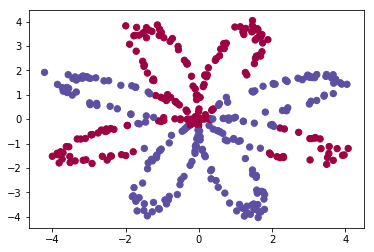

In [9]:
parameters = initialize_two_hidden_layer_nn(2,16,8,1)
for i in range(100):
    AL,cache = forward_prop(X, parameters)
    cost = cost_function(AL,Y)
    acc = ((forward_prop(X,parameters)[0][:,0] > 0.5)*1==Y[:,0]).sum()/len(Y)
    if i%5==0: print(f"Epoch :{i}, Cost : {cost:.3f}, Accuracy: {acc:.2f}")
    parameters = backward_prop(X,Y,parameters,cache,lr=0.5)
plt.scatter( X[:,0],X[:,1], c=(forward_prop(X,parameters)[0][:,0] > 0.5)*1, s=40, cmap=plt.cm.Spectral)